# Perguntas para serem sanadas com os experimentos
1. Qual heurística encontrou mais soluções?
2. Qual a melhor heurística em termos de quantidade de atribuição de valores
3. Para o problema do Futoshiki e levando em consideração os casos de teste executados, vale a pena utilizar alguma heurística para corte? Levando em consideração o tempo de processamento e a quantidade de atribuições.
4. Existe algum padrão entre quantidade de restrições e solução do problema?

#### Heurísticas

0 - Backtracking sem poda

1 - Backtracking com verificação adiante

2 - Backtracking com MVR + Verificação adiante

3 - Backtracking com MVR + Verificação adiante + Grau (para desempate)

4 - Backtracking com MVR (Valores válidos) + Verificação adiante + Grau (para desempate)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

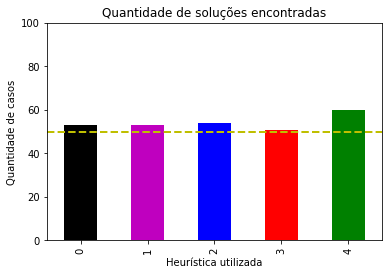

In [3]:
# Read the csv file with the results of futoshiki_all.txt
df = pd.read_csv("report.csv")


df1 = df[df.solutionFound==True].groupby(['heuristicType'])[['solutionFound']].count()
#print(df1)
df1.plot(kind='bar', title='Quantidade de soluções encontradas', ylim=(0,100), color='kmbrg', legend=False)

plt.axhline(y=50, color='y', label='Average', linestyle='--', linewidth=2)
plt.xlabel("Heurística utilizada")
plt.ylabel("Quantidade de casos")
plt.show()

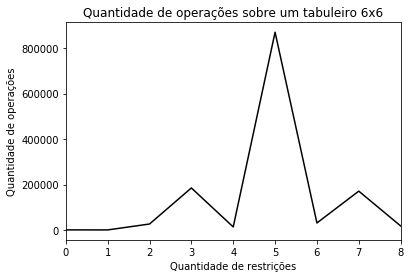

In [29]:
df2 = df[(df.dimension==6) & (df.heuristicType==2)]
df2 = df2.sort_values(by='constraints')
df2 = df2[['operations', 'constraints']].groupby(['constraints']).mean()
# print(df2)
df2.plot(kind='line', use_index=False, title='Quantidade de operações sobre um tabuleiro 6x6', legend=False, color='k')
plt.xlabel("Quantidade de restrições")
plt.ylabel("Quantidade de operações")
plt.show()
#plt.savefig('constraints.pdf', bbox_inches='tight')

In [36]:
# Read the csv file with the results of mrv_only.txt
df_mrv = pd.read_csv("report_mrv_only.csv")

No arquivo mrv_only.csv, todas as heurísticas encontraram uma solução para todos os casos de teste

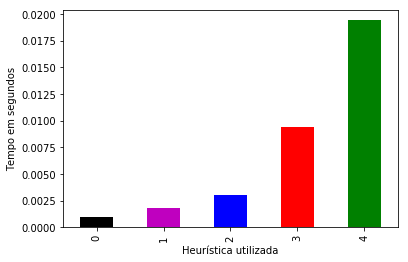

In [37]:
#  Desempenho de cada heurística no conjunto de dados mrv_only.txt
df3 = df_mrv[['heuristicType', 'second']].groupby(['heuristicType']).sum()
df3.plot(kind='bar', color='kmbrg', legend=False)
plt.xlabel("Heurística utilizada")
plt.ylabel("Tempo em segundos")
plt.show()

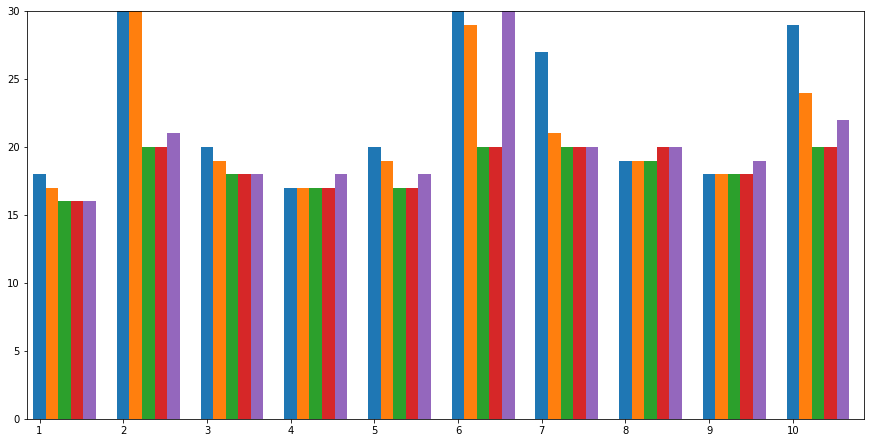

In [152]:
fig, ax = plt.subplots(figsize=(15,7.5))

index = np.arange(10)
w = 0.15

df_h0 = df_mrv[(df_mrv.heuristicType==0) & (df_mrv.dimension==6)][['test', 'operations']]
df_h1 = df_mrv[(df_mrv.heuristicType==1) & (df_mrv.dimension==6)][['test', 'operations']]
df_h2 = df_mrv[(df_mrv.heuristicType==2) & (df_mrv.dimension==6)][['test', 'operations']]
df_h3 = df_mrv[(df_mrv.heuristicType==3) & (df_mrv.dimension==6)][['test', 'operations']]
df_h4 = df_mrv[(df_mrv.heuristicType==4) & (df_mrv.dimension==6)][['test', 'operations']]

plt.bar(index+w*1, df_h0['operations'], width=w)
plt.bar(index+w*2, df_h1['operations'], width=w)
plt.bar(index+w*3, df_h2['operations'], width=w)
plt.bar(index+w*4, df_h3['operations'], width=w)
plt.bar(index+w*5, df_h4['operations'], width=w)

#plt.grid(True)
plt.ylim(0, 30)
plt.xlim(0, 10)
plt.xticks(index + w, range(1,11))

plt.show()

# 